
SVM Kernel=LINEAR C=1  → Accuracy: 0.605
                   precision    recall  f1-score   support

  Mildly Anti-GMO       0.54      0.59      0.56        63
   Mildly Pro-GMO       0.47      0.48      0.47        63
Strongly Anti-GMO       0.77      0.69      0.73        54
 Strongly Pro-GMO       0.70      0.69      0.70        58

         accuracy                           0.61       238
        macro avg       0.62      0.61      0.61       238
     weighted avg       0.61      0.61      0.61       238



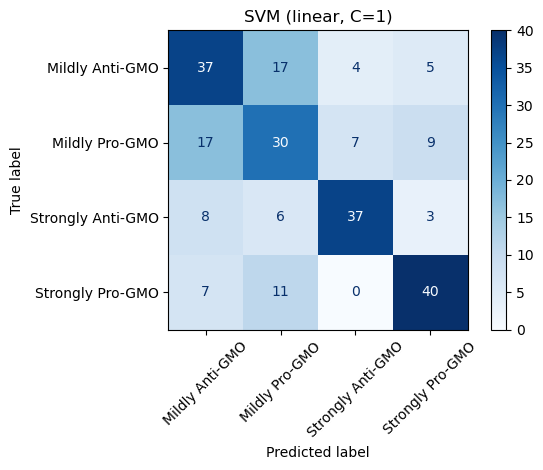


SVM Kernel=LINEAR C=10 → Accuracy: 0.588
                   precision    recall  f1-score   support

  Mildly Anti-GMO       0.53      0.63      0.58        63
   Mildly Pro-GMO       0.45      0.37      0.40        63
Strongly Anti-GMO       0.72      0.67      0.69        54
 Strongly Pro-GMO       0.67      0.71      0.69        58

         accuracy                           0.59       238
        macro avg       0.59      0.59      0.59       238
     weighted avg       0.59      0.59      0.58       238



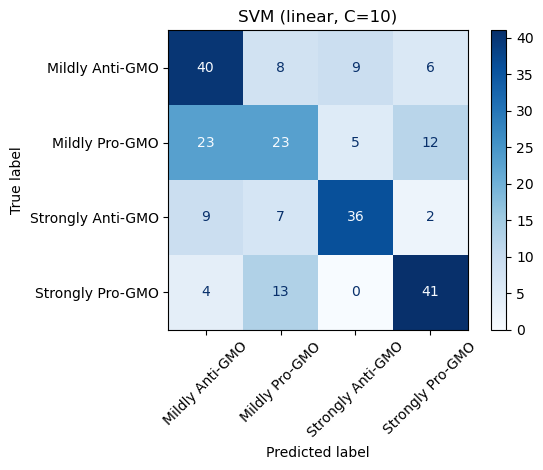


SVM Kernel=RBF  C=1  → Accuracy: 0.592
                   precision    recall  f1-score   support

  Mildly Anti-GMO       0.51      0.60      0.55        63
   Mildly Pro-GMO       0.46      0.48      0.47        63
Strongly Anti-GMO       0.78      0.67      0.72        54
 Strongly Pro-GMO       0.71      0.64      0.67        58

         accuracy                           0.59       238
        macro avg       0.62      0.60      0.60       238
     weighted avg       0.61      0.59      0.60       238



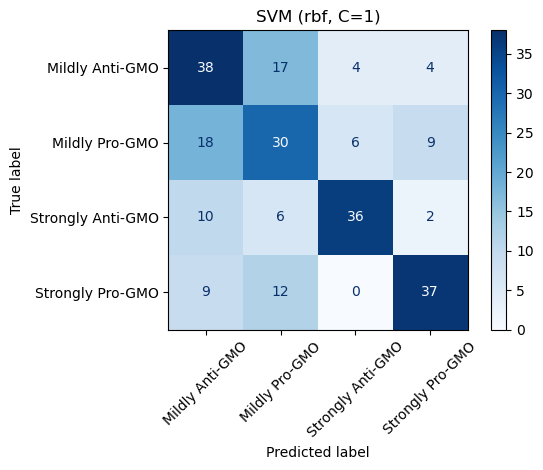


SVM Kernel=RBF  C=10 → Accuracy: 0.618
                   precision    recall  f1-score   support

  Mildly Anti-GMO       0.55      0.62      0.58        63
   Mildly Pro-GMO       0.49      0.44      0.47        63
Strongly Anti-GMO       0.77      0.69      0.73        54
 Strongly Pro-GMO       0.69      0.74      0.72        58

         accuracy                           0.62       238
        macro avg       0.63      0.62      0.62       238
     weighted avg       0.62      0.62      0.62       238



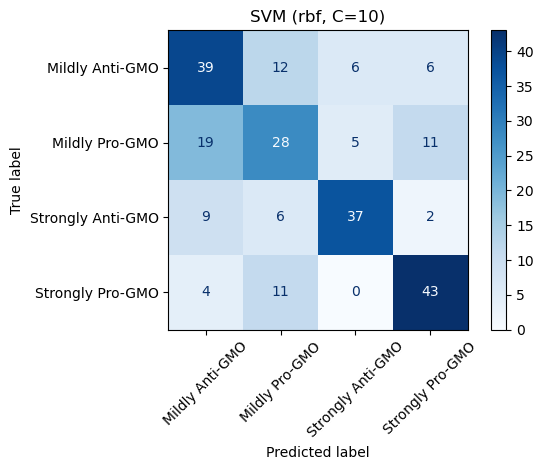


SVM Kernel=POLY C=1  → Accuracy: 0.576
                   precision    recall  f1-score   support

  Mildly Anti-GMO       0.41      0.70      0.52        63
   Mildly Pro-GMO       0.57      0.37      0.45        63
Strongly Anti-GMO       0.79      0.63      0.70        54
 Strongly Pro-GMO       0.75      0.62      0.68        58

         accuracy                           0.58       238
        macro avg       0.63      0.58      0.59       238
     weighted avg       0.62      0.58      0.58       238



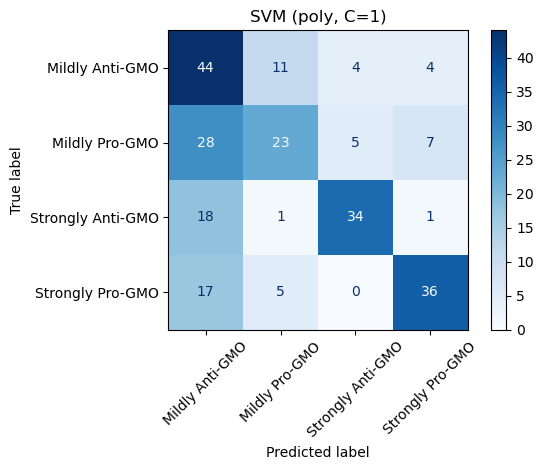


SVM Kernel=POLY C=10 → Accuracy: 0.601
                   precision    recall  f1-score   support

  Mildly Anti-GMO       0.43      0.86      0.57        63
   Mildly Pro-GMO       0.72      0.29      0.41        63
Strongly Anti-GMO       0.78      0.67      0.72        54
 Strongly Pro-GMO       0.83      0.60      0.70        58

         accuracy                           0.60       238
        macro avg       0.69      0.60      0.60       238
     weighted avg       0.69      0.60      0.59       238



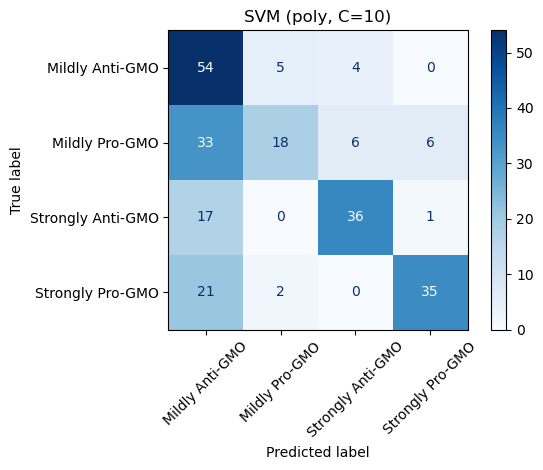

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score


df = pd.read_csv("df_tfidf.csv")
X = df.drop(columns="label")
y = df["label"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


configs = [
    ("linear", 1), ("linear", 10),
    ("rbf",    1), ("rbf",    10),
    ("poly",   1), ("poly",   10),
]


results = {}
for kernel, C in configs:
    if kernel == "poly":
        clf = SVC(kernel=kernel, degree=3, C=C, random_state=42)
    else:
        clf = SVC(kernel=kernel, C=C, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[(kernel, C)] = acc

    print(f"\nSVM Kernel={kernel.upper():<4} C={C:<2} → Accuracy: {acc:.3f}")
    print(classification_report(y_test, y_pred, target_names=clf.classes_))

    cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
    disp = ConfusionMatrixDisplay(cm, display_labels=clf.classes_)
    disp.plot(cmap="Blues", xticks_rotation=45)
    plt.title(f"SVM ({kernel}, C={C})")
    plt.tight_layout()
    plt.show()


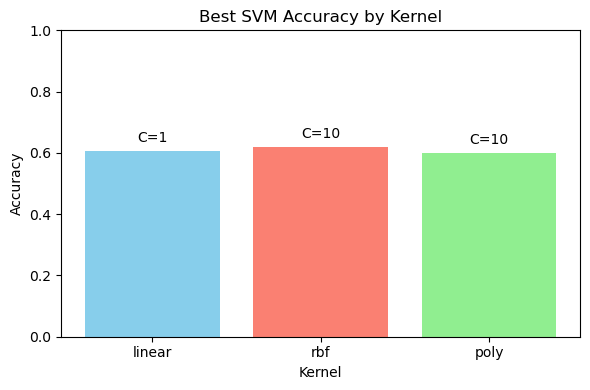

In [ ]:
import matplotlib.pyplot as plt

best_per_kernel = {}
for (kernel, C), acc in results.items():
    if kernel not in best_per_kernel or acc > best_per_kernel[kernel][1]:
        best_per_kernel[kernel] = (C, acc)

kernels    = list(best_per_kernel.keys())
best_C     = [best_per_kernel[k][0] for k in kernels]
accuracies = [best_per_kernel[k][1] for k in kernels]

plt.figure(figsize=(6, 4))
bars = plt.bar(kernels, accuracies, color=['skyblue','salmon','lightgreen'])
plt.ylim(0, 1)
plt.title("Best SVM Accuracy by Kernel")
plt.xlabel("Kernel")
plt.ylabel("Accuracy")


for bar, c_val in zip(bars, best_C):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.02,
             f"C={c_val}", ha='center', va='bottom')

plt.tight_layout()
plt.show()


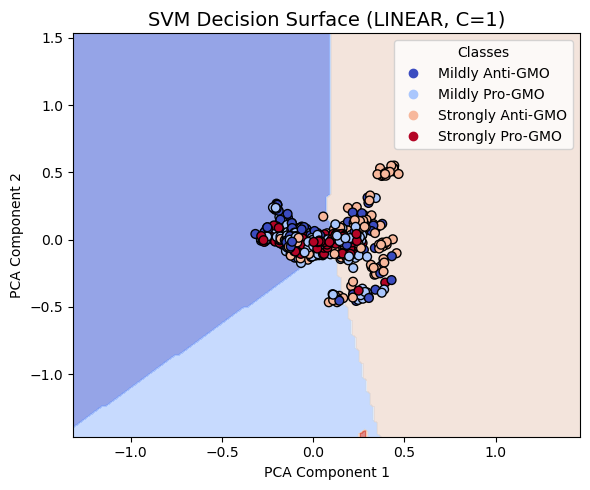

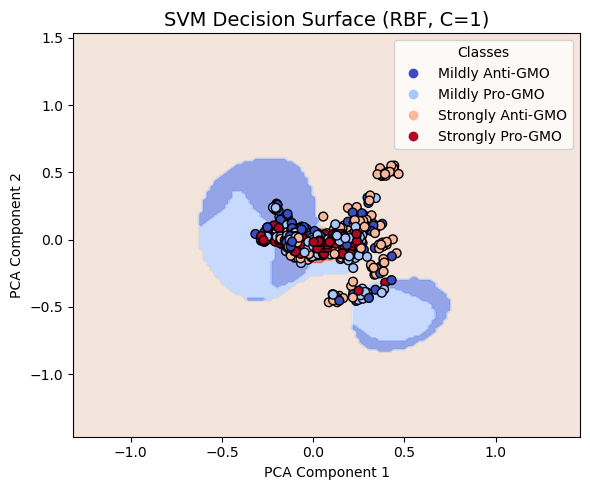

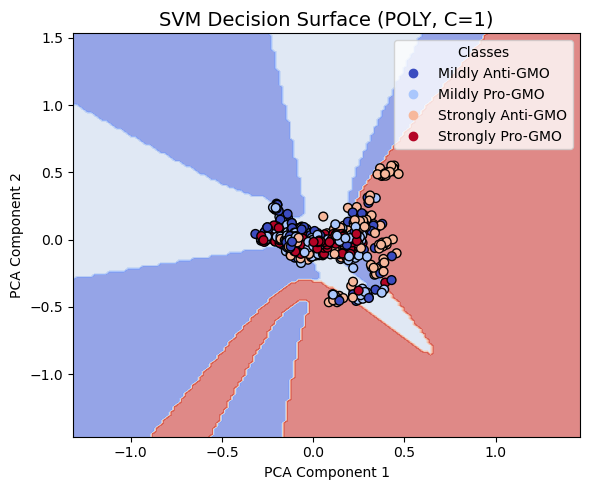

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder


df = pd.read_csv("df_tfidf.csv")
X = df.drop(columns="label")
y = df["label"]

le = LabelEncoder()
y_enc = le.fit_transform(y)


pca = PCA(n_components=2, random_state=42)
X2 = pca.fit_transform(X)


def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h)
    )
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    return ax.contourf(xx, yy, Z, **params)


configs = [
    ("linear", 1),
    ("rbf",    1),
    ("poly",   1),
]


X0, X1 = X2[:, 0], X2[:, 1]
xx, yy = make_meshgrid(X0, X1)

for kernel, C in configs:
    
    if kernel == "poly":
        clf = SVC(kernel=kernel, degree=3, C=C, random_state=42)
    else:
        clf = SVC(kernel=kernel, C=C, random_state=42)

    
    clf.fit(X2, y_enc)

    
    fig, ax = plt.subplots(figsize=(6, 5))

    
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.6)

    
    scatter = ax.scatter(
        X0, X1,
        c=y_enc,
        cmap=plt.cm.coolwarm,
        edgecolor="k",
        s=40
    )

    ax.set_title(f"SVM Decision Surface ({kernel.upper()}, C={C})", fontsize=14)
    ax.set_xlabel("PCA Component 1")
    ax.set_ylabel("PCA Component 2")

    
    handles, _ = scatter.legend_elements()
    ax.legend(handles, le.classes_, title="Classes", loc="upper right")

    plt.tight_layout()
    plt.show()


